In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbodykit.lab import *

In [2]:
# generate catalog with Position and Velocity columns; values are sampled from
# normal dist
# number of discrete objects/galaxies varries
catalog = UniformCatalog(nbar=100, BoxSize=1.0) # nbar is number density

In [3]:
print(catalog.size) # equivalent to len(catalog)
print(catalog["Position"])

95
dask.array<array, shape=(95, 3), dtype=float64, chunksize=(95, 3), chunktype=numpy.ndarray> first: [0.16525271 0.50057533 0.05370795] last: [0.45420865 0.71647102 0.35536218]


In [4]:
# column manipulation
BoxSize = 2500
catalog["Position"] *= BoxSize # renormalize position
catalog["Mass"] = np.power(10, np.random.uniform(12,15, size=len(catalog)))

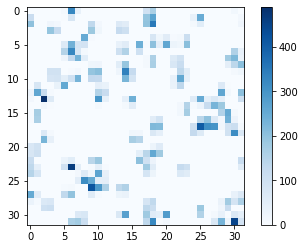

In [8]:
# make density field mesh from catalog
mesh = catalog.to_mesh(Nmesh=64, BoxSize=BoxSize)
mesh.save('mesh.bigfile') # save to reload later
# 2D preview
fig = plt.figure()
density_field = plt.imshow(mesh.preview(axes=[0,1], Nmesh=32), cmap='Blues')
fig.colorbar(density_field)

In [42]:
# use mesh in other algos
r = FFTPower(mesh, '1d', Nmu=5)
r.save("power-result.json")